# Homework 2
Integrantes del grupo: 
<br>
Andrés Bohórquez - Código: 00320727
<br>
Gian Tituaña - Código: 00325991


## 1. Standard Digital Signature Protocol Review

The standard, cryptographically robust protocol for creating a digital signature uses asymmetric cryptography combined with secure hashing to provide assurance of both origin authentication and integrity.
The process follows four steps:
- Digest Computation: A cryptographic hash function computes a short digest $H(M)$ of the original message $M$.
- Signing: The sender encrypts the hash value $H(M)$ using their own Private Key ($SK_{Signer}$). This encrypted hash is the signature ($Sig$).
- Transmission: The sender transmits the original message and the signature: $\{M, Sig\}$.
- Verification: The receiver decrypts $Sig$ using the sender's publicly available Public Key ($PK_{Signer}$) to recover the original hash value $H(M)$. The receiver then independently computes a hash $H(M')$ on the received message $M'$ and verifies that $H(M') = H(M)$. If they match, integrity and authentication are confirmed.

### Critique of Flawed Alternatives

Students must analyze two proposed alternative signature schemes that deviate from the standard protocol and detail which desirable properties are violated.

### Mechanism 1: 

This scheme proposes using a symmetric key scheme instead of Public Key Cryptography (PKC). To verify the signature, the recipient must give the signature back to the signer, who decrypts and checks it.

### Mechanism 2:

The signer encrypts the entire object $M$ with their private key, and the reader decrypts the entire resulting ciphertext using the signer's public key to both read and verify the content.

---

La sección “Standard Digital Signature Protocol Review” analiza el protocolo estándar de firma digital y su relación con el Digital Signature Standard (DSS).  
Una firma constituye un mecanismo de autenticación que confirma que la información proviene de una fuente confiable. De manera análoga, una **firma digital** es un método criptográfico que autentica que los datos digitales provienen de un origen legítimo.  
El *Digital Signature Standard* (DSS) define los algoritmos utilizados para generar firmas digitales, empleando el *Secure Hash Algorithm* (SHA) para garantizar la autenticación y la integridad de los documentos electrónicos (GeeksforGeeks, n.d.).

### Funcionamiento del DSS

En el lado del emisor, el DSS calcula primero un código hash del mensaje original. Luego, junto con un número aleatorio ($k$), la clave privada del remitente ($PR(a)$), y un conjunto de parámetros públicos globales ($PU(g)$), estos valores se ingresan en la función de firma.  
Este proceso genera la firma digital compuesta por dos valores: ($r$) y ($s$).  
El emisor envía el mensaje original acompañado de estos valores de firma al receptor (GeeksforGeeks, n.d.).

En el lado del receptor, se vuelve a calcular el hash del mensaje recibido y se ejecuta la función de verificación, que utiliza como entradas el hash calculado, los componentes de la firma (($r$, $s$)), la clave pública del remitente y los parámetros globales.  
Si el resultado coincide con ($r$), la firma se considera válida y se confirma que únicamente el remitente —en posesión de su clave privada— pudo haber generado la firma (GeeksforGeeks, n.d.).

Este proceso garantiza las propiedades fundamentales de una firma digital: **autenticación del origen**, **integridad del mensaje** y **no repudio**.

---

## Relación con el Protocolo Estándar de Firma Digital

El procedimiento del DSS se alinea con las cuatro etapas del protocolo estándar descrito en el enunciado:

1. **Digest Computation**  
   Se aplica una función hash criptográfica al mensaje original ($M$), generando un resumen ($H(M)$).

2. **Signing**  
   El emisor cifra el hash utilizando su clave privada ($SK_{Signer}$), generando la firma ($Sig$).  
   Este paso asegura que solo el titular legítimo de la clave privada puede producir una firma válida.

3. **Transmission**  
   El remitente envía al receptor el mensaje original y la firma generada: $\{M, Sig\}$.

4. **Verification**  
   El receptor utiliza la clave pública del firmante ($PK_{Signer}$) para descifrar ($Sig$) y obtener el hash original ($H(M)$).  
   Luego calcula un nuevo hash ($H(M')$) sobre el mensaje recibido.  
   Si ($H(M') = H(M)$), se confirma tanto la integridad del mensaje como la autenticación del origen.

---

## Análisis de Mecanismos Alternativos Propuestos

### **Mecanismo 1: Uso de criptografía simétrica para “firmar”**

Este mecanismo propone utilizar una clave simétrica compartida entre emisor y receptor, de forma que el receptor debe devolver la firma al emisor para verificarla.

Este diseño presenta varios problemas:

1. **No permite verificabilidad pública**  
   Las firmas digitales requieren criptografía asimétrica, donde cualquier persona puede verificar la firma con la clave pública del firmante.  
   En un sistema simétrico, solo quienes poseen la clave compartida pueden verificar, lo cual invalida la firma como prueba verificable por terceros.

2. **Rompe el principio de no repudio**  
   Si ambas partes comparten la misma clave, cualquiera pudo generar la firma.  
   Por lo tanto, el firmante puede negar haberla creado, pues no existe evidencia criptográfica única que lo identifique.

3. **Dependencia del firmante para verificar**  
   El receptor debe reenviar la firma al emisor para verificarla, lo cual:
   - elimina la independencia de la verificación, y  
   - permite que el emisor manipule o niegue el resultado.

En conclusión, este mecanismo implementa algo más parecido a un MAC que a una firma digital. No permite verificabilidad pública ni no repudio, por lo que **no cumple con los requisitos de un sistema de firma digital**.
<br>

---

### **Mecanismo 2: Cifrar el mensaje completo ($M$) con la clave privada**

Este mecanismo propone que el firmante cifre el mensaje completo usando su clave privada para que el receptor lo descifre con la clave pública.

Este enfoque también presenta varios problemas:

1. **Rompe la confidencialidad del mensaje**  
   La clave pública es de acceso universal.  
   Si el mensaje se cifra con la clave privada, **cualquiera** podría descifrarlo. Esto elimina completamente la privacidad del contenido.

2. **Es ineficiente y no aporta seguridad adicional**  
   La firma digital estándar solo cifra el hash del mensaje.  
   Cifrar el mensaje completo:
   - aumenta el costo computacional  
   - no mejora la autenticidad ni integridad  

3. **Confunde los roles de cifrado y firma**  
   La firma digital no se usa para ocultar información, sino para verificar autenticidad.  
   Este mecanismo mezcla dos operaciones con fines distintos.

4. **Mal uso de las claves asimétricas**  
   En una firma correcta:
   - la clave privada firma el *hash*  
   - la clave pública verifica la firma  

   En este mecanismo se usa la clave privada para cifrar todo el mensaje, lo cual no corresponde a un protocolo de firma y es criptográficamente incorrecto.

En conclusión, aunque el mecanismo permite cierta verificación de origen, sacrifica la confidencialidad, es ineficiente y no garantiza una verificación segura del contenido. Por esto, **no se considera un esquema robusto ni compatible con los estándares modernos de firmas digitales**.

---

## 2. Vulnerability to Attack Vectors

In the following scenarion, Oscar is an adversary. Provide a detail analysis of the potential problems with each of them, the vulnerabilities that Oscar is exploiting, and the cryptographic solutions that can be used to address them. 

### Scenario 1:

Alice sends to Bob:
-  x = "Transfer \$1000 to Mark" 
- the corresponding digital signature $auth(x)$

Oscar intercepts the transmission and replaces the recipient, modifying the message to:
- x =  "Transfer \$1000 to Oscar". 

Will Bob detect this alteration?


### Scenario 2:

Oscar observes a valid transaction message $x$ ("Transfer \$1000 to Mark") and its authentic signature $auth(x)$. Oscar intercepts and retransmits this exact message and signature 100 times to Bob.

---

**Bob sí podrá detectar la alteración.** 

**Justificación:** Se hace uso de la propiedad de las funciones de hashing "Second Pre-image Resistance",la cual establece que, dado un mensaje $M$ y su *hash* $H(M)$, es computacionalmente inviable encontrar otro mensaje $M'$ tal que $H(M') = H(M)$.

**Desde Alice (emisor)** 
- **Se tiene el mensaje M**: "Transfer $1000 to Mark"
- **Se calcula el hash del mensaje**:
    $H(M)$
- **Signing usando su propia llave privada**:
    $Sig = \text{Cifrar}(H(M), SK_{Alice})$
- **Transmission** Envía el mensaje original y la firma a Bob:
    $\{ M, Sig \}$

**Desde Oscar (atacante)**
- **Intercepta la transmisión:** Captura $\{ M, Sig \}$.
- **Manipulación de la información:** Reemplaza el mensaje con $M'$ = "Transfer $1000 to Oscar"
sin modificar la firma original.
* **Retransmisión:** Envía el paquete manipulado a Bob
    $\{ M', Sig \}$

**Desde Bob (receptor)**
- **Recepción:** Recibe $\{ M', Sig \}$.
- **Verificación:** 
    1.  Descifra la firma $Sig$ usando la clave pública de Alice ($PK_{Alice}$) para recuperar el *hash* que Alice calculó originalmente.
    2.  De maneara independiente Bob calcula el $H(M')$ del mensaje recibido y lo compara con el hash original $H(M)$
    3.  Los hashes no son iguales asi que Bob rechaza el mensaje ya que considera que fue alterado durante la transmisión.

---





### Scenario 2:

Oscar observes a valid transaction message $x$ ("Transfer \$1000 to Mark") and its authentic signature $auth(x)$. Oscar intercepts and retransmits this exact message and signature 100 times to Bob.



---
**Bob no podrá detectar la alteración.** 

**Justificación:** Se trata de un replay attack, y debido a que la firma digital es un protocolo que verifica autenticidad e integradad, cada vez que Bobo recibe el par $\{ M, Sig \}$ se verifica que la transmisión es exitosa. 

Debido a esto Bob procesará 100 transacciones como legítimas lo que causa una perdida importante de dinero en el emisor. 

El problema de esto es que el protocolo de firma digital no tiene un "estado" o "memoria" para saber si el mensaje en particular ya ha sido procesado. 

Una solución criptográfica robusta que ayude a prevenir esto debería incluir información sobre el contexto del mensaje. Asimismo, se pueden utilizar soluciones de protocolo que limiten la frecuencia de los envíos. Algunas soluciones podrían incluir: 

- Números de un solo uso o Nonce: se puede incluir un numero aleatorio, de manera que el receptor mantenga desde su lado un registro de todos los nonce recibidos. Así puede rechazar cualquier mensaje que contenga un nonce que ya fue procesado. 
- Marcas de tiempo o Timestamps: antes de la firmar el mensaje se puede incluir una marca de tiempo de manera que cuando Bobo reciba lo reciba, pueda rechazar cualquier mensaje que este fuera de una ventana aceptable de tiempo. 
- Tokens de un solo uso: este mecanismo invalida el mensaje después de su primer uso por el servidor. 
- Limite de frencuencia: básicamente es rechazar múltiples solicitudes que tengan el mismo identificador único de transacción durante un período corto y alertar.


---

## 3. Research: Transport Layer Security (TLS 1.3)

Provide a detailed analysis of the TLS 1.3 protocol. Focus on the following areas:
- The architecture of TLS, and its evolution over the last few years
- Cryptographic primitives that are being used
- How the core goals of confidentiality, integrity, and authentication are being satisfied
- Explain the modern applications in which TLS is being used

---

### **Introduction**

TLS es un protocolo diseñado para proveer seguridad a la capa de transporte. Surgió a partir del SSL (Secure sockets layer) y ha estado evolucionando desde 1999 con TLS 1.0 hasta 2018 con TLS 1.3 con el objetivo de mejorar la seguridad y el rendimiento. La arquitectura de TLS en general está orientada a impedir que ningún tercero pueda interceptar o manipular cualquier mensaje transmitido entre cliente y servidor. 

### **The architecture of TLS and its evolution**

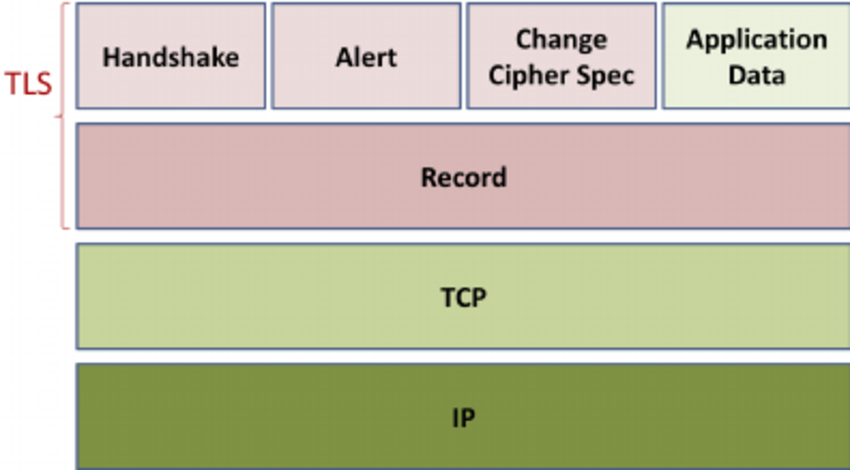

El funcionamiento de TLS se basa en que cuando un cliente se conecta a un servidor usando TCP, se inicia un proceso llamado SSL/TLS hanshake. Durante este proceso el cliente envía al servidor la información necesaria para verificar compatibilidad y establecer una conexión segura. Una vez verificada la comptatibilidad el servidor proporciona un certificado digital que debe ser validado por el cliente o por un tercero. Hecho esto, se pueden intercambiar llaves públicas o puede no haber intercambio como tal (depende del cifrado elegido).  Según Cloudfare, "Los pasos exactos de un protocolo de enlace TLS variarán según el tipo de algoritmo de intercambio de claves utilizado y de los conjuntos de cifrado compatibles con ambas partes" (párr.3). Sin embargo, el cliente y servidor generan la clave de sesión para la encriptación simétrica y pueden iniciar la comunicación de forma segura. 

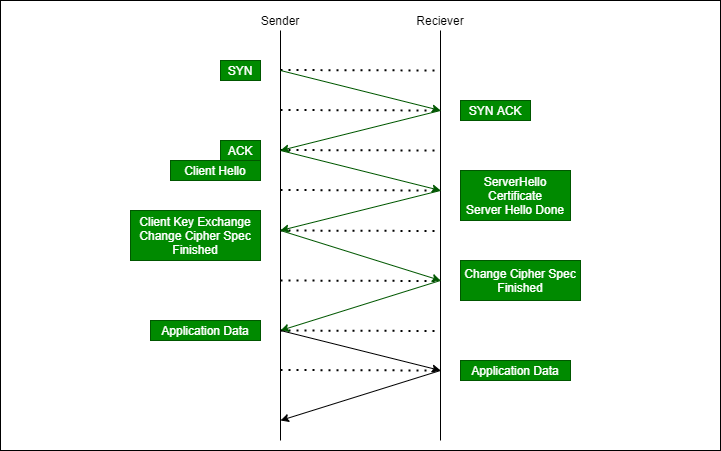

TLS es en un principio una actualización de SSL 3.0 realizada en el año 1999, como una forma más segura de este protocolo que mejoraba la seguridad criptográfica y mitigaba ciertos ataques. Luego en 2006-2008 hubo en progreso en TLS con los protocolos TLS 1.1 y TLS 1.2. Según Patil: "TLS 1.2 (RFC 5246) added support for stronger cryptographic algorithms like AES and SHA-2, along with improved handshake mechanisms. Even in 2025, it remains the most widely used TLS version on the Internet" (2025, párr 5). Estos avances introdujeron protección contra ataques de oráculo de relleno y soporte para algoritmos como AES y SHA-2. Finalmente en 2018, se introduce TLS 1.3 el cual eliminó algoritmos criptográficos anticuados, mejoró la velocidad del proceso de establecimiento de la conexión o handshake e incluyó por defecto "perfect forward secrecy".

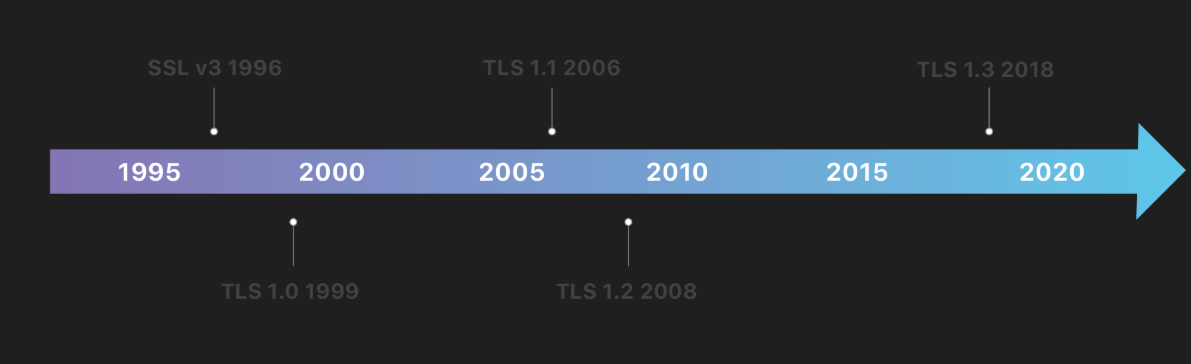

### **Cryptographic primitives**

TLS 1.3 utiliza primitivas criptográficas modernas enfocadas en seguridad y eficiencia, que incluyen: 

**Algoritmos de Intercambio de Claves**

Estos algoritmos permiten que dos partes establezcan un secreto compartido (una clave de sesión) a través de un canal de comunicación inseguro, sin que un atacante que escuche la conversación pueda descubrir ese secreto.

* **Diffie-Hellman de Campo Finito (DHE):** Es el algoritmo de intercambio de claves original. Utiliza la dificultad de calcular logaritmos discretos en un campo finito (aritmética modular sobre números primos grandes) para permitir que ambas partes lleguen independientemente al mismo secreto compartido. Su variante "efímera" (que genera nuevas claves para cada sesión) proporciona **Perfect Forward Secrecy (PFS)**.

* **Diffie-Hellman de Curva Elíptica (ECDHE):** Es una versión moderna y mucho más eficiente de DHE. En lugar de usar la aritmética de números primos grandes, utiliza la matemática de las curvas elípticas. Logra el mismo (o mayor) nivel de seguridad que DHE pero con claves mucho más pequeñas, lo que reduce drásticamente el costo computacional y acelera el establecimiento de la conexión. Es el estándar de facto en protocolos modernos como TLS 1.3.


**Cifrado Autenticado con Datos Asociados (AEAD)**

Un algoritmo AEAD es un tipo de cifrado que proporciona simultáneamente **confidencialidad** (los datos están cifrados), **integridad** (los datos no se pueden modificar sin ser detectados) y **autenticación** (se puede verificar quién originó el mensaje).

* **AES-GCM (Galois/Counter Mode):** Es un modo de operación para el cifrado de bloques AES. Combina el cifrado AES en modo *Counter* (para la confidencialidad) con un código de autenticación de mensajes llamado *GMAC* (para la integridad y autenticidad). Es extremadamente rápido y eficiente, especialmente en hardware moderno que incluye aceleración para AES, y es el cifrado más común en HTTPS.

* **ChaCha20-Poly1305:** Es otra construcción AEAD que compite con AES-GCM. Combina el cifrado de flujo **ChaCha20** (una alternativa rápida a AES) con el autenticador de mensajes **Poly1305**. Su principal ventaja es su excelente rendimiento en software, especialmente en dispositivos que no tienen aceleración de hardware para AES (como muchos teléfonos móviles y dispositivos de bajo consumo).

**Funciones Hash Criptográficas**

Toman una entrada de cualquier tamaño (un mensaje, un archivo, etc.) y producen una salida de tamaño fijo llamada "hash" o "huella digital". Son funciones de un solo sentido (no se puede revertir) y están diseñadas para ser resistentes a colisiones (es computacionalmente inviable encontrar dos entradas diferentes que produzcan el mismo hash).

* **SHA-256, SHA-384:** Son miembros de la familia SHA-2 (Secure Hash Algorithm 2). El número indica el tamaño de la salida en bits (SHA-256 produce un hash de 256 bits, SHA-384 uno de 384 bits). Se utilizan masivamente para verificar la integridad de los datos, en firmas digitales, certificados y en la minería de criptomonedas (Bitcoin usa SHA-256).


**Algoritmos de Firma Digital**

Se utilizan para probar la autenticidad e integridad de un mensaje, garantizando que el remitente es quien dice ser (autenticación) y que el mensaje no ha sido alterado (integridad). Utilizan un par de claves: una clave privada para *firmar* y una clave pública para *verificar*.

* **RSA-PSS (Probabilistic Signature Scheme):** Es un esquema de firma moderno que utiliza el algoritmo RSA. A diferencia del esquema de firma RSA más antiguo (PKCS#1 v1.5), PSS es "probabilístico", lo que significa que introduce aleatoriedad en el proceso de firma. Esto proporciona pruebas de seguridad mucho más robustas y se considera el estándar preferido para nuevas aplicaciones con RSA.

* **ECDSA (Elliptic Curve Digital Signature Algorithm):** Es el análogo del Algoritmo de Firma Digital (DSA) que utiliza criptografía de curva elíptica. Al igual que ECDHE, su gran ventaja sobre RSA es la eficiencia: ofrece un nivel de seguridad comparable con claves y firmas mucho más pequeñas. Es muy conocido por ser el algoritmo utilizado en Bitcoin y otras criptomonedas para firmar transacciones.

* **EdDSA (Edwards-curve Digital Signature Algorithm):** Es un esquema de firma digital moderno que utiliza una familia específica de curvas elípticas (curvas de Edwards). Está diseñado para ser muy rápido y, lo que es más importante, para ser inherentemente más seguro contra errores de implementación y ciertos ataques de canal lateral. Ed25519 (EdDSA sobre la curva Curve25519) es su implementación más popular y es ampliamente considerada una de las mejores opciones para firmas digitales.

**Derivación de Claves**

* **HKDF (HMAC-based Key Derivation Function):** Es una Función de Derivación de Claves (KDF). Su propósito no es cifrar, sino tomar una fuente de "material de clave" (como el secreto compartido de Diffie-Hellman, que no es uniforme) y convertirlo en una o más claves criptográficas fuertes, seguras y uniformes, listas para ser usadas por algoritmos de cifrado o autenticación. Se basa en HMAC (que a su vez usa una función hash como SHA-256).

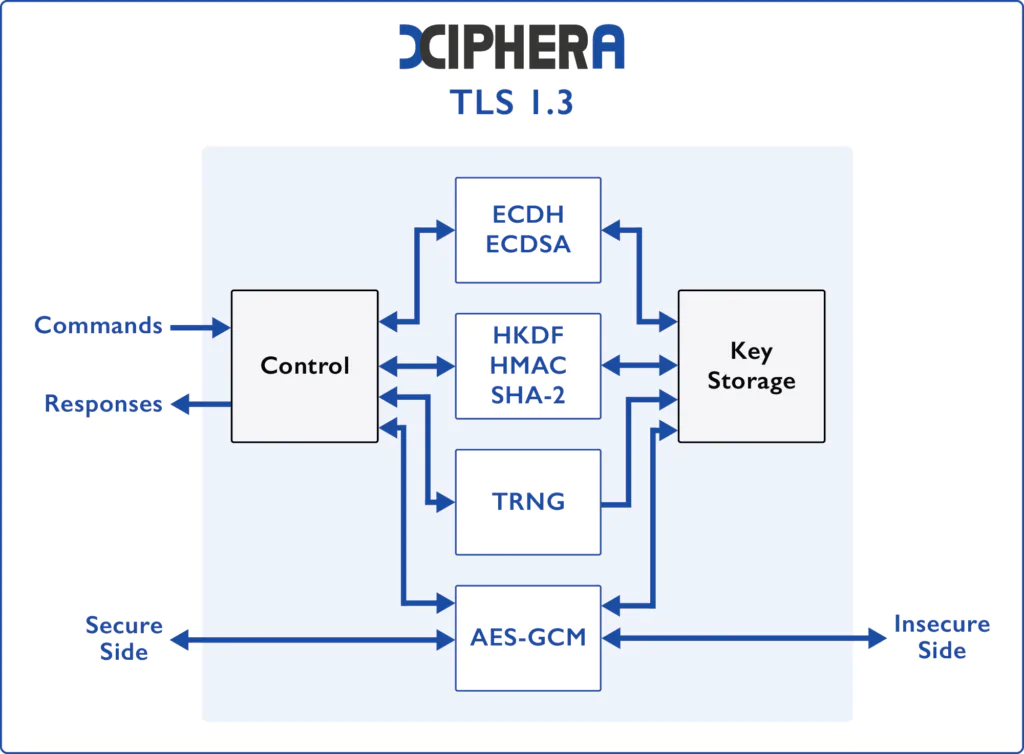

### **Confidentiality, integrity, and authentication**

TLS 1.3 logra cumplir con los objetivos de seguridad de confidencialidad, integridad y autenticación a través de su diseño que previene manipulación, escuchas pasivas, o falsificación en la red. 

En el ámbito de la confidencialidad, TLS utiliza una combinación de cifrado simétrico y asimétrico para garantizar la privacidad de los mensajes. Durante el protocolo de enlace TLS, el cliente y el servidor TLS acuerdan un algoritmo de cifrado y una clave secreta compartida que se utilizará únicamente durante una sesión, de esta manera todos los datos de la aplicación se cifran con claves simétricas robustas, y que tras su intercambio, se envían los datos cifrados (AEAD). Según Rushika Jayasinghe (2024): "La importancia de AEAD frente a los métodos tradicionales radica en estos datos asociados. Direcciones, puertos, números de secuencia, etc., pueden incluirse como datos asociados" (párr.2). Además, se impone confidencialidad absoluta a través de ECDHE efímero donde elcompromiso de claves de largo plazo (privadas de certificados) no compromete sesiones pasadas.

Respecto al ámbito de integridad, gracias al cifrado AEAD cualquier alteración de bits o modificación del texto cifrado provocará un fallo en el descifrado ya que cada registro de TLS incluye un tag de autenticación de 128 bits. De acuerdo con Jayasinghe (2024): " Este mecanismo se basa en vincular los paquetes de red a los datos cifrados. Por ejemplo, si añadimos un número de secuencia y un puerto a un paquete, la autenticación no funcionará con un número de secuencia o un puerto diferentes"(párr.2). Asimismo, junto con HMAC (algoritmo que combina la función hash con la clave de sesión secreta establecida durante el handshake) genera un hash de transcripción, de modo que ambas partes verifican este hash en los mensajes de finalización para protegerse contra conexiones cortadas. 

Finalmente, en relación con la autenticación el proceso comienza con el  servidor enviando de un certificado X.509 conteniendo clave pública y el certificado firmado por una Autoridad Certificadora (CA) de confianza. Luego el cliente verifica que este certificado sea válido y haya sido firmado por una Autoridad de Certificación (CA) en la que confía. El servidor debe entonces probar que posee la clave privada correspondiente a ese certificado público, generalmente firmando una parte del handshake (el mensaje CertificateVerify).  Esto garantiza al cliente que está hablando con el servidor legítimo y no con un impostor (ataque Man-in-the-Middle). Como plantea IBM (2025): "If the TLS server requires client authentication, the server verifies the client's identity by verifying the client's digital certificate with the public key for the CA that issued the personal certificate to the client, in this case CA X"(párr.3). Si se utiliza la autenticación del cliente, este se verifica de forma similar ante el servidor.

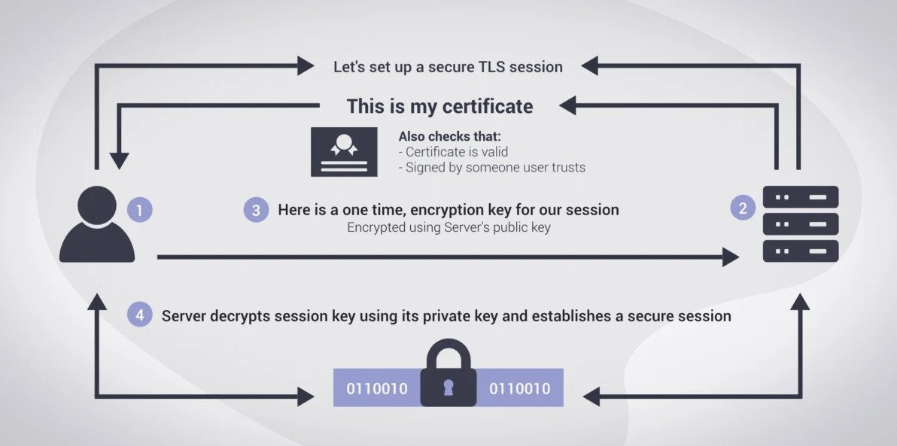

### **Modern applications**

TLS 1.3 es ampliamente adoptado en navegadores web, servidores de correo, VPNs, dispositivos IoT, redes 5G y plataformas en la nube. Su menor latencia facilita conexiones rápidas en aplicaciones móviles y web. Su característica 0-RTT permite reducir tiempos de conexión en reanudaciones de sesión, aunque requiere medidas para prevenir ataques de repetición. Como lo señala Canarytrap (2023), "Without TLS, sensitive information such as logins, credit card details and personal details can easily be gleaned by others, but also browsing habits, e-mail correspondence, online chats and conferencing calls can be monitored"(párr.8). Grandes actores como Google, Microsoft y Apple respaldan TLS 1.3 para incrementar la privacidad y seguridad en Internet. Además, es compatible con los principales navegadores, sistemas operativos, bibliotecas y servicios en la nube.

**Web browsers y servidores**

Chrome, Firefox, Safari y Edge habilitaron TLS 1.3 de forma predeterminada hace tiempo. En 2019, aproximadamente entre un cuarto y un tercio de las conexiones de cliente en cada navegador se realizaban mediante TLS 1.3.

**APIs y Microservicios**

Asegura la comunicación entre diferentes servidores en arquitecturas de backend y entre aplicaciones móviles y sus APIs.

**Correo Electrónico**

Protocolos como SMTPS, POP3S e IMAPS usan TLS para cifrar la comunicación entre tu cliente de correo y el servidor.

**Internet de las Cosas (IoT)**

Se utiliza para cifrar las comunicaciones entre dispositivos inteligentes (luces, termostatos, cámaras) y los servidores en la nube.

**VPNs**

Algunas implementaciones de VPN pueden usar TLS como protocolo de túnel. Usa TLS para intercambio de claves y autenticación lo cual reduce latencia en reconexiones. 

**Aplicaciones de Mensajería**

Muchas aplicaciones de mensajería lo utilizan para proteger la metadata y la conexión al servidor. Por ejemplo, WhatsApp, Wire, Telegram dependen de TLS para conexiones servidor y cifrado end-to-end en capa de aplicación, mientras que la mensajería de tipo emrpesarial como Slack usa TLS 1.3 para todas las conexiones al igual que Microsoft Teams que requiere TLS 1.2 o superior. 

**DNS Seguro**

También conocido como DNS sobre TLS (DoT), cifra consultas DNS y previene espionaje y manipulación del ISP. Algunos beneficios de esta implementación son la prevención del seguimiento de historial de navegación, DNS hijacking y spoofing.

**Streaming**

A través de RTMPS (RTMP sobre TLS) se protegen flujos de contenido premium. También con WebRTC que usa DTLS (Datagram TLS) permite una comunicación peer-to-peer cifrada usada en video conferencias o juegos.

**Servicios en la Nube**

Por ejemplo AWS, Azure, Google Cloud sus APIs usan TLS.



---

## 4. Design Problem

Design an architecture for a system that requires strong, verifiable, and legally enforceable non-repudiation, utilizing cryptographic principles alongside robust protocol design.

### Scenario: 

The application is a Secure Electronic Contract Signing System (SECS). Two parties, Alice (Service Provider) and Bob (Client), must execute a critical digital contract (e.g., an intellectual property license). The system must guarantee Non-Repudiation of Origin (neither party can deny signing the contract) and Non-Repudiation of Submission/Receipt (neither party can deny receiving the final signed contract). This is vital for maintaining the trustworthiness and legal enforceability of the digital transaction.

---

### Introducción
Se diseña una arquitectura para el sistema **Secure Electronic Contract Signing System (SECS)** en el que Alice (proveedora) y Bob (cliente) firman un contrato digital crítico con garantías de no repudio del origen y de la recepción. El diseño combina criptografía de clave pública, sellos de tiempo confiables y almacenamiento inmutable de evidencias.

### Componentes principales
- **Alice y Bob:** poseedores de certificados X.509 emitidos por una CA y autenticados mediante MFA.
- **Servidor SECS:** coordina la verificación de firmas, solicita sellos de tiempo y custodia las evidencias.
- **Autoridad de Certificación (CA):** emite los certificados necesarios para la validación de identidades.
- **Time Stamping Authority (TSA):** provee sellos de tiempo basados en RFC 3161.
- **Audit Server:** almacena evidencias de forma inmutable (WORM o blockchain).
- **OCSP/CRL:** servicios para comprobar el estado de revocación de certificados.
- **HSM:** protege las claves privadas del servidor.
- **Canal seguro:** todo flujo se transporta mediante TLS 1.3.

### Flujo criptográfico
1. **Autenticación:** Alice y Bob acceden al sistema usando MFA y certificados.
2. **Creación del contrato:** Alice redacta el contrato $M$ y lo envía al servidor por TLS 1.3.
3. **Firma de Alice (no repudio del origen):**
   - Calcula el hash $h = H(M)$ con SHA-256.
   - Genera la firma $Sig_A = Sign(SK_{Alice}, h)$ bajo el estándar DSS.
   - Entrega $\{M, Sig_A, Cert_{Alice}\}$ al servidor.
4. **Registro y sello de tiempo:**
   - El servidor verifica el certificado de Alice (OCSP) y solicita un sello $TS_1$ a la TSA.
   - Almacena la evidencia parcial $E_1 = \{h, Sig_A, Cert_{Alice}, TS_1\}$.
5. **Entrega a Bob:** el servidor envía $\{M, Sig_A, Cert_{Alice}, TS_1\}$ a Bob.
6. **Firma y acuse de Bob (no repudio de recepción):**
   - Bob verifica la firma de Alice y calcula $h' = H(M)$.
   - Si $h' = h$, firma $Sig_B = Sign(SK_{Bob}, h)$ y genera un acuse $ACK = Sign(SK_{Bob}, H(M \Vert Sig_A \Vert TS_1))$.
   - Devuelve $\{Sig_B, ACK, Cert_{Bob}\}$ al servidor.
7. **Registro final y entrega:**
   - El servidor valida las firmas de Bob, solicita un sello $TS_2$ para $H(M \Vert Sig_A \Vert Sig_B \Vert ACK)$ y crea la evidencia final
     $E_{final} = \{M, Sig_A, Sig_B, ACK, TS_1, TS_2, Certs\}$.
   - Entrega a ambas partes una copia del contrato y las evidencias.

### Garantías de no repudio
- **Origen:** $Sig_A$, $Cert_{Alice}$ y $TS_1$ prueban que Alice firmó el documento. 
- **Recepción:** el acuse firmado por Bob y $TS_2$ demuestran que recibió y aceptó el contrato final.
- **Verificabilidad pública:** cualquier tercero puede validar las firmas con los certificados X.509.
- **Inmutabilidad:** las evidencias se almacenan en repositorios WORM o blockchain.

### Algoritmos y estándares clave
| Propósito | Mecanismo | Referencia |
|-----------|-----------|------------|
| Hash | SHA-256 | NIST (2015) |
| Firma digital | ECDSA P-256 / RSA-3072 | NIST (2023) |
| Certificados | X.509 v3 | ITU-T (2019) |
| Transporte | TLS 1.3 | Rescorla (2018) |
| Sellos de tiempo | TSP RFC 3161 | Adams et al. (2001) |
| Firmas avanzadas | PAdES / CAdES / XAdES | ETSI (2016) |

### Diagrama de flujo (Generado con Mermaid)
![Diagrama Screenshot Pregunta 4.png](<attachment:Diagrama Screenshot Pregunta 4.png>)

### Riesgos y mitigaciones
| Riesgo | Descripción | Mitigación |
|--------|-------------|------------|
| Robo de claves | Compromiso de claves privadas | Uso de HSM y revocación inmediata |
| TSA comprometida | Sellos de tiempo falsos | Redundancia con múltiples TSAs |
| Repudio posterior | Negación de firmas | Evidencias digitales y timestamps |
| Certificados revocados | Uso de certificados inválidos | OCSP y CRL actualizados |
| Manipulación del registro | Alteración de evidencias | Almacenamiento WORM o blockchain |

### Conclusión
El SECS combina PKI, firmas digitales DSS, sellos de tiempo RFC 3161 y almacenamiento inmutable para ofrecer garantías técnicas y legales de integridad, autenticación y no repudio tanto del origen como de la recepción.
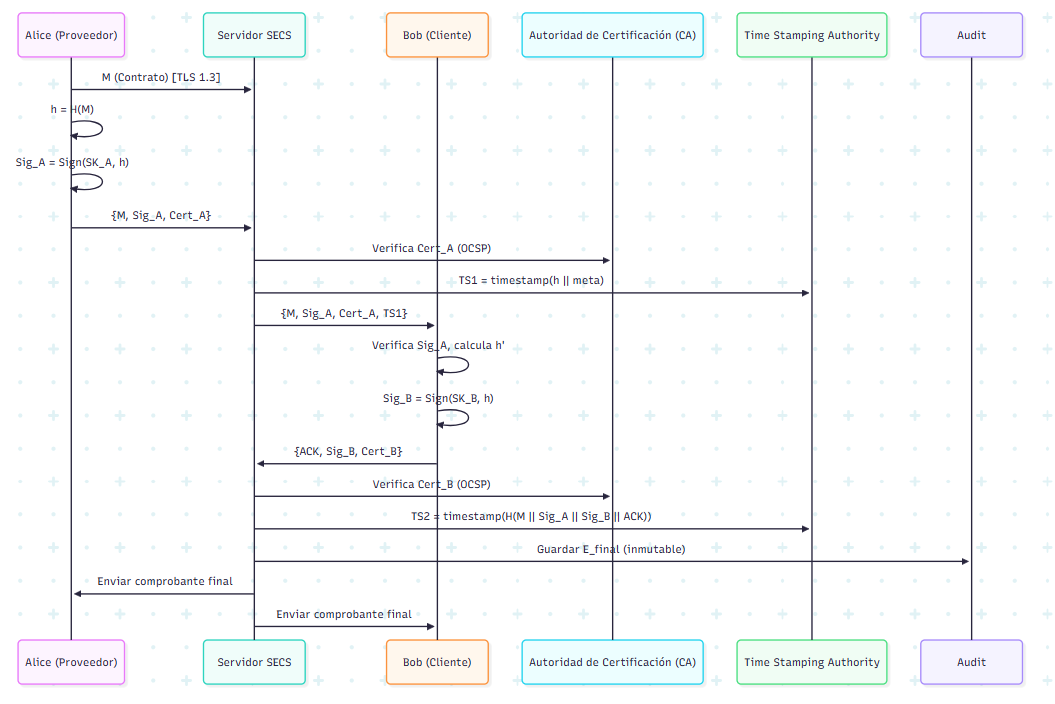

---
## Bibliografía

Adams, C., Cain, P., Pinkas, D., & Zuccherato, R. (2001). *RFC 3161: Internet X.509 Public Key Infrastructure Time-Stamp Protocol (TSP).* Internet Engineering Task Force.

Amazon Web Services. (2021, marzo 10). AWS support for TLS 1.0 and 1.1 — Deprecation notice. AWS Security Blog. https://aws.amazon.com/blogs/security/tls-1-2-required/

Apple Inc. (2019, marzo 25). TLS 1.3 support added in iOS 12.2, macOS 10.14.4, watchOS 5.2, and tvOS 12.2. Apple Developer Documentation. https://developer.apple.com/documentation/security/

Aviram, N., et al. (2016). DROWN: Breaking TLS using SSLv2. USENIX Security Symposium, 689-706.

Barker, E., Chen, L., Roginsky, A., Vassilev, A., & Davis, R. (2019). Recommendation for Pair-Wise Key-Establishment Schemes Using Discrete Logarithm Cryptography. NIST Special Publication 800-56A Rev. 3.

Bernstein, D. J. (2008). ChaCha, a variant of Salsa20. Workshop Record of SASC, 8, 3-5.

Bernstein, D. J., Duif, N., Lange, T., Schwabe, P., & Yang, B. Y. (2012). High-speed high-security signatures. Journal of Cryptographic Engineering, 2(2), 77-89.

Bhargavan, K., & Leurent, G. (2016). Transcript Collision Attacks: Breaking Authentication in TLS, IKE, and SSH. Network and Distributed System Security Symposium (NDSS).

Bhargavan, K., Blanchet, B., & Kobeissi, N. (2017). Verified Models and Reference Implementations for the TLS 1.3 Standard Candidate. IEEE Symposium on Security and Privacy, 483-502.

CanaryTrap. (2023). The crucial role of TLS encryption in modern cybersecurity. https://www.canarytrap.com/blog/the-crucial-role-of-tls-encryption-in-modern-cybersecurity/

Catchpoint. (2024). TLS 1.2 vs. 1.3—Handshake, Performance, and Other Improvements. https://www.catchpoint.com/http2-vs-http3/tls1-2-vs-1-3

Cloudflare. (2018, agosto 13). A detailed look at RFC 8446 (TLS 1.3). Cloudflare Blog. https://blog.cloudflare.com/rfc-8446-tls-1-3/

Cloudflare. (2024). The state of the post-quantum Internet. https://blog.cloudflare.com/pq-2024/

Cloudflare. (s. f.). What happens in a TLS handshake? https://www.cloudflare.com/es-es/learning/ssl/what-happens-in-a-tls-handshake/

Cloudflare. (s. f.). Why use TLS 1.3? https://www.cloudflare.com/es-es/learning/ssl/why-use-tls-1.3/

de Chasteauneuf, G. (2023). The Evolution of Web Security, Unpacking TLS 1.2 and TLS 1.3. LinkedIn Engineering Blog.

Dierks, T., & Rescorla, E. (2008). The Transport Layer Security (TLS) Protocol Version 1.2. RFC 5246, IETF.

Dowling, B., Fischlin, M., Günther, F., & Stebila, D. (2021). A Cryptographic Analysis of the TLS 1.3 Handshake Protocol. Journal of Cryptology, 34(4), 37. https://eprint.iacr.org/2020/1044.pdf

Encryption Consulting. (2025). Understanding TLS 1.2 and TLS 1.3. https://www.encryptionconsulting.com/tls-1-2-and-tls-1-3/

Eronen, P., & Tschofenig, H. (2005). Pre-Shared Key Ciphersuites for Transport Layer Security (TLS). RFC 4279, IETF.

ETSI. (2016). *ETSI EN 319 142: Electronic Signatures and Infrastructures (ESI) – Formats for advanced electronic signatures.*

GeeksforGeeks. (s. f.). Digital Signature Standard (DSS). https://www.geeksforgeeks.org/computer-networks/digital-signature-standard-dss/

GeeksforGeeks. (s. f.). Transport layer security (TLS). https://www.geeksforgeeks.org/computer-networks/transport-layer-security-tls/

Google. (2024). HTTPS encryption on the web - Transparency Report. https://transparencyreport.google.com/https/overview

Google Cloud. (2022). Gmail SMTP and IMAP security—TLS 1.2 and 1.3 support. Google Workspace Admin Help. https://support.google.com/a/answer/10018170

Google Developers. (2019). Android 10 and TLS 1.3 support. Android Open Source Project Documentation. https://source.android.com/security/tls

IBM. (s. f.). How TLS provides identification, authentication, confidentiality, and integrity. IBM. https://www.ibm.com/docs/en/ibm-mq/9.3.x?topic=tls-how-provides-identification-authentication-confidentiality-integrity

IETF. (2019). TLS 1.3: One Year Later. https://www.ietf.org/blog/tls13-adoption/

IETF. (2025). Hybrid Key Exchange in TLS 1.3. Internet-Draft draft-ietf-tls-hybrid-design.

Internet Engineering Task Force (IETF). (2018). The Transport Layer Security (TLS) Protocol Version 1.3 (RFC 8446). https://doi.org/10.17487/RFC8446

Internet Engineering Task Force (IETF). (2019). ChaCha20 and Poly1305 for IETF protocols (RFC 8439). https://doi.org/10.17487/RFC8439

ITU-T. (2019). *Recommendation X.509: Information technology – Open systems interconnection – The directory: Public-key and attribute certificate frameworks.*

Jager, T., Schwenk, J., & Somorovsky, J. (2015). On the Security of TLS 1.3 and QUIC Against Weaknesses in PKCS#1 v1.5 Encryption. ACM CCS, 1185-1196.

Jayasinghe, R. (2024). What is AEAD (Authenticated Encryption with Associated Data). Medium. https://medium.com/@rushikajayasinghe/what-is-aead-authenticated-encryption-with-associated-data-17a5b2f42404

Jonsson, J., & Kaliski, B. (2003). Public-Key Cryptography Standards (PKCS) #1: RSA Cryptography Specifications Version 2.1. RFC 3447, IETF.

Krawczyk, H. (2010). Cryptographic Extraction and Key Derivation: The HKDF Scheme. CRYPTO 2010, LNCS 6223, 631-648.

Krawczyk, H., & Eronen, P. (2010). HMAC-based Extract-and-Expand Key Derivation Function (HKDF). RFC 5869, IETF.

Langley, A., Hamburg, M., & Turner, S. (2016). Elliptic Curves for Security. RFC 7748, IETF.

McGrew, D., & Viega, J. (2004). The Galois/Counter Mode of Operation (GCM). Submission to NIST.

Möller, B., Duong, T., & Kotowicz, K. (2014). This POODLE Bites: Exploiting The SSL 3.0 Fallback. Security Advisory.

Mozilla Foundation. (2018, agosto 13). TLS 1.3 is here! Mozilla Security Blog. https://blog.mozilla.org/security/2018/08/13/tls-1-3/

National Institute of Standards and Technology. (2015). *FIPS 180-4: Secure Hash Standard (SHS).*

National Institute of Standards and Technology. (2023). *FIPS 186-5: Digital Signature Standard (DSS).*

National Institute of Standards and Technology. (2024). Guidelines for TLS Implementations. NIST Special Publication 800-52 Revision 2.

NIST. (2024). Post-Quantum Cryptography Standardization. https://csrc.nist.gov/projects/post-quantum-cryptography

OpenAI. (2025). ChatGPT (GPT-5-Codex) [Large language model]. https://chat.openai.com/

Patil, K. (2025). From SSL to TLS 1.3: 30 years of encryption and innovation. https://www.appviewx.com/blogs/from-ssl-to-tls-1-3-30-years-of-encryption-and-innovation/

Rescorla, E. (2018). The Transport Layer Security (TLS) Protocol Version 1.3. RFC 8446, Internet Engineering Task Force (IETF). https://datatracker.ietf.org/doc/html/rfc8446

Rescorla, E., et al. (2018). Security Analysis of TLS 1.3. RFC 8446, Section 1.3, IETF.

Salowey, J., Zhou, H., Eronen, P., & Tschofenig, H. (2008). Transport Layer Security (TLS) Session Resumption without Server-Side State. RFC 5077, IETF.

Shor, P. W. (1997). Polynomial-time algorithms for prime factorization and discrete logarithms on a quantum computer. SIAM Review, 41(2), 303-332.

Sikeridis, D., Kampanakis, P., & Devetsikiotis, M. (2020). Post-Quantum Authentication in TLS 1.3: A Performance Study. Network and Distributed System Security Symposium (NDSS). https://www.ndss-symposium.org/ndss-paper/post-quantum-authentication-in-tls-1-3-a-performance-study/

Sikeridis, D., Kampanakis, P., & Devetsikiotis, M. (2024). The impact of data-heavy, post-quantum TLS 1.3 on the Time-To-Last-Byte. NIST 5th PQC Standardization Conference.

SSL Dragon. (2025). 12 SSL Stats You Should Know in 2025. https://www.ssldragon.com/blog/ssl-stats/

Sullivan, N. (2018). A Detailed Look at RFC 8446 (a.k.a. TLS 1.3). Cloudflare Blog. https://blog.cloudflare.com/rfc-8446-aka-tls-1-3/

Sullivan, N., Stebila, D., & Wiggers, T. (2024). The state of the post-quantum Internet. Cloudflare Blog.

W3Techs. (2024). Usage Statistics of SSL Certificate Authorities for Websites. https://w3techs.com

WolfSSL Inc. (2019, septiembre 10). TLS 1.3 adoption in IoT and embedded systems. wolfSSL Blog. https://www.wolfssl.com/tls-1-3-adoption-in-iot/